In [1]:
import os, sys, PIL
import numpy as np
np.random.seed(1234)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import tensorflow as tf
import keras
from keras import backend as K
print 'keras backend: ', K._BACKEND
print 'keras version: ', keras.__version__
print 'tensorflow version: ', tf.__version__

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


keras backend:  tensorflow
keras version:  2.0.0
tensorflow version:  1.0.1


Using TensorFlow backend.


In [2]:
sess = tf.Session()
K.set_session(sess)
# fix input size in model for tensorflow
K.set_image_dim_ordering('th')

In [3]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [4]:
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()
Xtrain = Xtrain.reshape(Xtrain.shape[0], 1, Xtrain.shape[1], Xtrain.shape[2]).astype('float32') / 255
Xtest = Xtest.reshape(Xtest.shape[0], 1, Xtest.shape[1], Xtest.shape[2]).astype('float32') / 255
ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)
num_classes = 10

print 'Xtrain shape:', Xtrain.shape

Xtrain shape: (60000, 1, 28, 28)


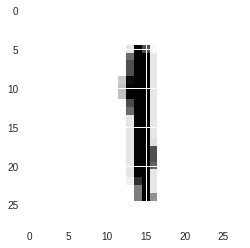

In [5]:
plt.imshow( Xtrain[np.random.randint( 0, Xtrain.shape[0]), 0, :, :] )

In [6]:
# create model
def simpleModel():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def largerModel():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(32*196, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
    return model

In [7]:
simple = simpleModel()

WEIGHTS_NAME = 'mnist_cnn_simple.hdf'
if os.path.exists(WEIGHTS_NAME):
    print 'Loading existing model'
    simple.load_weights(WEIGHTS_NAME)
else:
    simple.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=10, batch_size=128)
    simple.save_weights(WEIGHTS_NAME)

Loading existing model


In [8]:
large = largerModel()
WEIGHTS_NAME = 'mnist_cnn_large.hdf'
if os.path.exists(WEIGHTS_NAME):
    print 'Loading existing model'
    large.load_weights(WEIGHTS_NAME)
else:
    large.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=10, batch_size=128)
    large.save_weights(WEIGHTS_NAME)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 142s - loss: 0.2710 - acc: 0.9120 - val_loss: 0.0586 - val_acc: 0.9824
Epoch 2/10
60000/60000 [==============================] - 139s - loss: 0.0693 - acc: 0.9786 - val_loss: 0.0406 - val_acc: 0.9861
Epoch 3/10
60000/60000 [==============================] - 142s - loss: 0.0525 - acc: 0.9831 - val_loss: 0.0401 - val_acc: 0.9864
Epoch 4/10
60000/60000 [==============================] - 141s - loss: 0.0428 - acc: 0.9866 - val_loss: 0.0296 - val_acc: 0.9911
Epoch 5/10
60000/60000 [==============================] - 141s - loss: 0.0367 - acc: 0.9881 - val_loss: 0.0259 - val_acc: 0.9911
Epoch 6/10
60000/60000 [==============================] - 156s - loss: 0.0305 - acc: 0.9904 - val_loss: 0.0249 - val_acc: 0.9907
Epoch 7/10
60000/60000 [==============================] - 155s - loss: 0.0284 - acc: 0.9910 - val_loss: 0.0242 - val_acc: 0.9911
Epoch 8/10
60000/60000 [=======================

In [11]:
scoresSimple = simple.evaluate(Xtest, ytest, verbose=0)
scoresLarge = large.evaluate(Xtest, ytest, verbose=0)
print 'Test accuracy simple: ', scoresSimple[1]
print 'Test accuracy large:  ', scoresLarge[1]

Test accuracy simple:  0.9899
Test accuracy large:   0.9921


(28, 28)
(1, 1, 28, 28)
Simple predicts 8
Large predicts  6


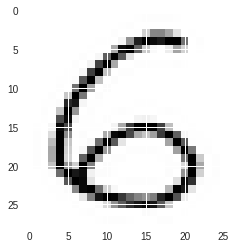

In [28]:
import PIL.ImageOps

img = PIL.Image.open('digit.jpg').convert('L')
img = PIL.ImageOps.invert(img)
img = np.asarray(img.resize((28, 28), PIL.Image.ANTIALIAS))
print img.shape
plt.imshow(img)

img = img.reshape(1, 1, 28, 28).astype('float32')
print img.shape

print 'Simple predicts', np.argmax(simple.predict(img))
print 'Large predicts ',np.argmax(large.predict(img))